# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as st

import seaborn as sb

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.dtypes

Hospital Name                  object
Provider Number                 int64
State                          object
Measure Name                   object
Number of Discharges           object
Footnote                      float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions        float64
Start Date                     object
End Date                       object
dtype: object

In [4]:
hospital_read_df['Measure Name'].head()

0    READM-30-HIP-KNEE-HRRP
1    READM-30-HIP-KNEE-HRRP
2    READM-30-HIP-KNEE-HRRP
3    READM-30-HIP-KNEE-HRRP
4    READM-30-HIP-KNEE-HRRP
Name: Measure Name, dtype: object

In [5]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [6]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Tsymbal Group Member\Anaconda2\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


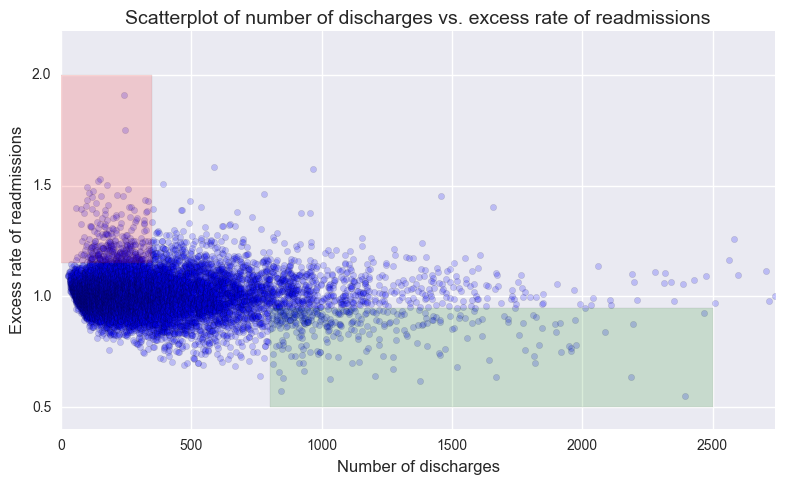

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [ ]:
# Your turn

**Question A**

I would like to answer question A as follows:

* In general, the plot given by the Preliminary report is correct. It shows the basic tendency of the data and indeed, the data shows the properties.

* However, we cannot say the statstics is correct. Because the shaded area in the group cannot be confidentely represents the two different groups. How to categorize the different groups need to be carefully investegated. 

* In the conclution, the preliminary report says that there is a significant correlation between hospital capacity (number of discharges) and readmission rates, we cannot totally agree with it. The real correlation relaton need to be revealed by the regression methd. This requires a linear reqression analysis of the data. 

* Only based on this picture, we cannot assert that small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation. It is highly possible that there are some other factors affect the small hospitals. This requires more dataset for the study

* Their statsitcal study is sampling from the population. In order to have a convincing result, they need to provide the confidence interval and *p-value* at least 

**Question B**

### $H_{0}$: Samll hospital with lower capacity ($<300$) has same average excess readmission rate as the big hospital with bigger capacity ($\geq300$). $\mu_{big}=\mu_{small}$

### $H_{1}$: Samll hospital with lower capacity ($<300$) has siganificant average excess readmission rate difference than the big hospital with bigger capacity ($\geq300$). $\mu_{big}\neq\mu_{small}$

In [8]:
## pick up two groups!

cleaner_hospital=clean_hospital_read_df.dropna(subset=['Number of Discharges','Excess Readmission Ratio'])

small_df=cleaner_hospital[cleaner_hospital['Number of Discharges']<300]
big_df=cleaner_hospital[cleaner_hospital['Number of Discharges']>=300]

Study of the small group

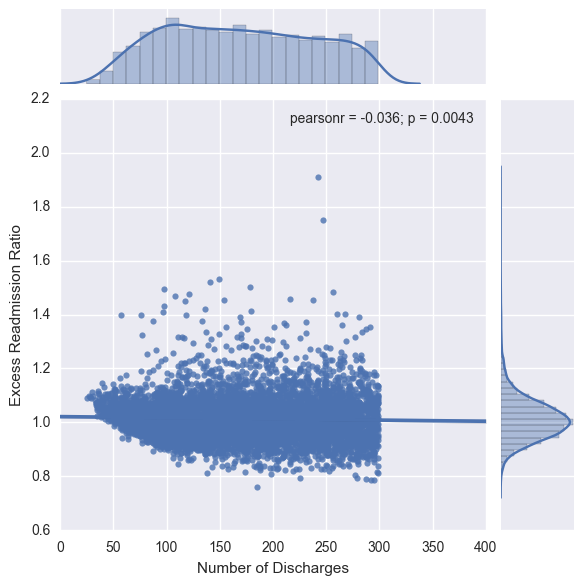

In [9]:
small_dis=small_df['Number of Discharges']
small_ratio=small_df['Excess Readmission Ratio']

sb.jointplot(data=small_df, x='Number of Discharges', y='Excess Readmission Ratio', kind='reg',xlim=(0,400))

In [10]:
small_mean=small_ratio.mean()
small_std=small_ratio.std()/np.sqrt(small_df.shape[0])

print small_mean
print small_std

1.01423821218
0.00105533345199


The big group:

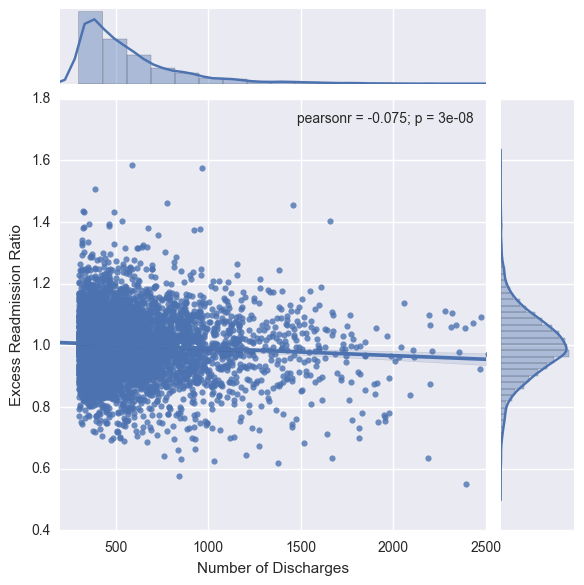

In [11]:
big_dis=big_df['Number of Discharges']
big_ratio=big_df['Excess Readmission Ratio']

sb.jointplot(data=big_df, x='Number of Discharges', y='Excess Readmission Ratio', kind='reg',xlim=(200,2500))

In [12]:
big_mean=big_ratio.mean()
big_std=big_ratio.std()/np.sqrt(big_df.shape[0])

print big_mean
print big_std

0.999870848024
0.00137744887778


We assume the null hypothosis that the sampling distribution of the sample mean difference is **Zero!**

In [13]:
mean_diff=-big_mean+small_mean
std_diff=np.sqrt(small_std**2+big_std**2)

print mean_diff
print std_diff

0.014367364157
0.00173525044469


The shape of the small and big dataframe

In [14]:
print small_df.shape[0]
print big_df.shape[0]

6108
5389


In [15]:
## The z-value

z_value=mean_diff/std_diff
print z_value

8.27970636801


In [16]:
print "The P-value is ",(1-st.norm.cdf(z_value))*100,"%"

The P-value is  1.11022302463e-14 %


### Conclution

If we set $\alpha=0.01 (1\%)$, then the calculated *p-value* is much smaller than the statistical significance value. So if we assume our null hypothosis is true, there is a $1.11\times10^{-14}\%$ that we have our measured value. So that we can reject our null hypothosis, which says there is no statistically difference between small and bigger group. So that the difference between small and big discharge groups do have the statistic significance. However, the pratical significance is 0.014 which is quite small compare with 1.0, only about $1\%$. So that we can say that pratically, there is no difference between small and big group, so that in order to have a correct and comprehensible investigation, we need more data and figure out other factors to reveal the relations. We cannot change any policy only based on the picture shows above.